In [37]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiDipoleModel
import smtf_utility as util

In [38]:
def percentage(input, predicted):
    adiff = abs(input-predicted)
    delta = 0
    if input > adiff:
        delta = input - adiff
    else:
        delta = adiff + input
    
    return ((delta/input) * 100)

In [39]:
sim = util.bf_simulator(distances=[1, 1.33, 1.66, 1.99], delta=30, scale=1e9)

xpole = 1
ypole = 2
zpole = -6

sim.add_dipole(0.0, 0, 0, xpole, 0, 0)
sim.add_dipole(0.0, 0, 0, 0, ypole, 0)
sim.add_dipole(0.0, 0, 0, 0, 0, zpole)

In [40]:
positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [41]:
model = MultiDipoleModel(poles=1, lrate=0.005, optimizer='adam', loss='mse', scale=1e9, early_stop=False, target_stop=.0000002)
test_epochs = 500

In [42]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 48095.957
epoch  1 --- Loss --- 44555.42
epoch  2 --- Loss --- 41330.953
epoch  3 --- Loss --- 38373.656
epoch  4 --- Loss --- 35655.84
epoch  5 --- Loss --- 33155.746
epoch  6 --- Loss --- 30854.088
epoch  7 --- Loss --- 28733.201
epoch  8 --- Loss --- 26776.781
epoch  9 --- Loss --- 24969.8
epoch  10 --- Loss --- 23298.45
epoch  11 --- Loss --- 21750.105
epoch  12 --- Loss --- 20313.3
epoch  13 --- Loss --- 18977.664
epoch  14 --- Loss --- 17733.863
epoch  15 --- Loss --- 16573.535
epoch  16 --- Loss --- 15489.216
epoch  17 --- Loss --- 14474.256
epoch  18 --- Loss --- 13522.757
epoch  19 --- Loss --- 12629.508
epoch  20 --- Loss --- 11789.902
epoch  21 --- Loss --- 10999.883
epoch  22 --- Loss --- 10255.874
epoch  23 --- Loss --- 9554.737
epoch  24 --- Loss --- 8893.702
epoch  25 --- Loss --- 8270.333
epoch  26 --- Loss --- 7682.4634
epoch  27 --- Loss --- 7128.178
epoch  28 --- Loss --- 6605.7476
epoch  29 --- Loss --- 6113.615
epoch  30 --- Loss --- 5650.3535

In [43]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 1.7001155296961465 minutes


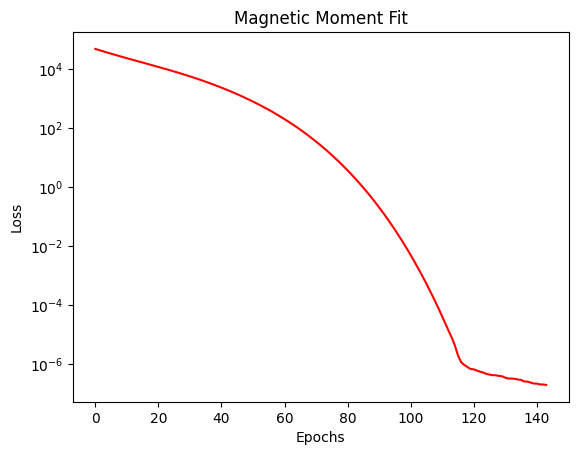

In [44]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [45]:
print("Predicted")
print(model.dipole())
print("Input")
print([[xpole, ypole, zpole]])

Predicted
[[ 0.99999994  1.9999994  -5.999987  ]]
Input
[[1, 2, -6]]


In [46]:
est = model.dipole()

#x_acc = ((xpole - abs(xpole - est[-1][0]))/xpole) * 100.0
#y_acc = ((ypole - abs(ypole - est[-1][1]))/ypole) * 100.0
#z_acc = ((zpole - abs(zpole - est[-1][2]))/zpole) * 100.0
x_acc = percentage( xpole, est[-1][0])
y_acc = percentage(ypole, est[-1][1])
z_acc = percentage(zpole, est[-1][2])
print("Percentage Accuracy X-axis", x_acc)
print("Percentage Accuracy Y-axis", y_acc)
print("Percentage Accuracy Z-axis", z_acc)

print("********************************")
overall_acc = (x_acc + y_acc + z_acc)/3
print("Average Accuracy: ", overall_acc)



Percentage Accuracy X-axis 99.99999403953552
Percentage Accuracy Y-axis 99.99997019767761
Percentage Accuracy Z-axis 99.99978542327881
********************************
Average Accuracy:  99.99991655349731
